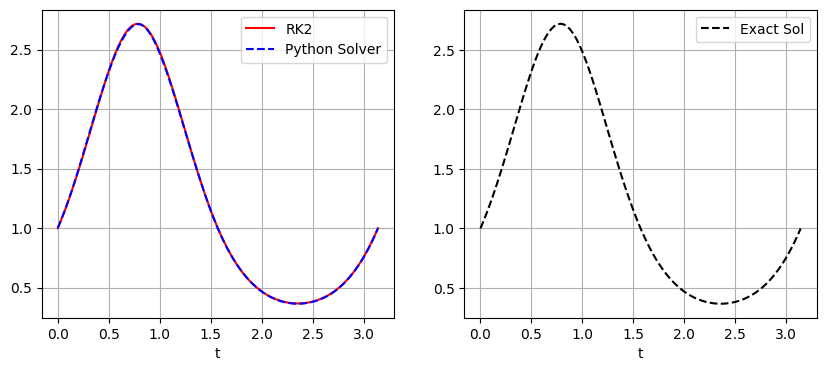

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def my_RK2(ds,t_span,s0):
    h = (t_span[-1] - t_span[0]) / (len(t_span) - 1)
    y = np.zeros(len(t_span))
    y[0] = s0
    for i in range(len(t_span)-1): #套公式
        k1 = ds(t_span[i], y[i])
        k2 = ds((t_span[i]+h), (y[i]+h*k1))
        y[i+1] = y[i] + ((k1+k2)*h)/2
    return [t_span, y]

f = lambda t, s: 2*np.cos(2*t)*np.exp(np.sin(2*t))
t_span = np.linspace(0, np.pi, 101) #切成100個interval
s0 = 1
exact_sol = lambda t: np.exp(np.sin(2*t)) #S的exact solution

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
t, s = my_RK2(f, t_span, s0) #使用RK2計算
plt.plot(t, s, "r-", label="RK2")
sol = solve_ivp(f, [0, np.pi], [s0], t_eval=t_span)
plt.plot(sol.t, sol.y[0], "b--", label="Python Solver")
plt.xlabel("t")
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(t_span, exact_sol(t_span), "k--", label="Exact Sol")
plt.xlabel("t")
plt.legend()
plt.grid(True)
plt.show()